# Multivariate normal distribution

In [1]:
import numpy as np

from bokeh.plotting import figure, output_notebook, show
output_notebook()

Loading BokehJS ...

## Univariate normal distribution

The normal distribution, also known as the Gaussian distribution, is defined by two parameters: the mean $\mu$ and the standard deviation $\sigma$. The square $\sigma^2$ of the standard deviation is called variance. We denote this distribution as: 

$$
\mathcal{N}(\mu, \sigma^2)
$$

Given $\mu$ and $\sigma$, the probability density function is given by 

$$
p(x \mid \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp{ \left( -\frac{(x - \mu)^2}{2\sigma^2}\right)}
$$

We call this distribution the univariate normal because it consists of only one random normal variable. Three examples of univariate normal distributions with different mean and variance are plotted in the next figure:

In [2]:
def uni_normal(x, mean, variance):
    """pdf of the univariate normal distribution."""
    return ((1. / np.sqrt(2 * np.pi * variance)) * 
            np.exp(-(x - mean)**2 / (2 * variance)))

### Graphas of  different univariate normal distributions

In [3]:
x = np.linspace(-4, 5, num=150)
fig = figure(plot_width=600, plot_height=400)
fig.line(x=x, y=uni_normal(x, mean=0, variance=1),color='red', legend_label='N(0,1)')
fig.line(x=x, y=uni_normal(x, mean=2, variance=2), color='blue', legend_label='N(2,2)')
fig.line(x=x, y=uni_normal(x, mean=-1, variance=0.5), color='black', legend_label='N(-1,0.5)')
show(fig)

## Multivariate normal distribution

The multivariate normal distribution is a multidimensional generalization of the univariae case. It represents the distribution of multiple random variables that can be correlated with each other.

Like the normal distribution, the multivariate normal is defined by sets of parameters: the mean vector $\mathbf{\mu}$ and the covariance matrix $\Sigma$ which measures the mutual dependencies of the random variables. 

The multivariate normal has a joint density given by:

$$
p(\mathbf{x} \mid \mathbf{\mu}, \Sigma) = \frac{1}{\sqrt{(2\pi)^d \lvert\Sigma\rvert}} \exp{ \left( -\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T \Sigma^{-1} (\mathbf{x} - \mathbf{\mu}) \right)}
$$

Where $\mathbf{x}$ a $d$-dimensional random vector, $\mathbf{\mu}$ is the mean vector, $\Sigma$ is the covariance matrix of size $d \times d$, and $\lvert\Sigma\rvert$ its determinant. We denote this multivariate normal distribution as: 

$$
\mathcal{N}(\mathbf{\mu}, \Sigma)
$$

In [22]:
def multi_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-x_m.T@np.linalg.inv(covariance)@x_m / 2))

Examples of two bivariate normal distributions are plotted below.

The figure on the left is a bivariate distribution with the covariance between $x_1$ and $x_2$ set to $0$ so that these 2 variables are independent:

$$
\mathcal{N}\left(
\begin{bmatrix}
0 \\
0
\end{bmatrix}, 
\begin{bmatrix}
1 & 0 \\
0 & 1 
\end{bmatrix}\right)
$$


The figure on the right is a bivariate distribution with the covariance between $x_1$ and $x_2$ set to be different than $0$ so that both variables are correlated. Increasing $x_1$ will increase the probability that $x_2$ will also increase:


$$
\mathcal{N}\left(
\begin{bmatrix}
0 \\
0
\end{bmatrix}, 
\begin{bmatrix}
1 & 0.9 \\
0.9 & 1
\end{bmatrix}\right)
$$

In [23]:
def surface(mean, covariance):
    d=2
    nb_of_x = 200 # grid size
    x1s = np.linspace(-3, 3, num=nb_of_x)
    x2s = np.linspace(-3, 3, num=nb_of_x)
    x1, x2 = np.meshgrid(x1s, x2s) 
    pdf = np.zeros((nb_of_x, nb_of_x))

    for i in range(nb_of_x):
        for j in range(nb_of_x):
            pdf[i,j] = multi_normal(
                np.matrix([[x1[i,j]], [x2[i,j]]]), 
                d, mean, covariance)
    return x1, x2, pdf  



In [24]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

<IPython.core.display.Javascript object>


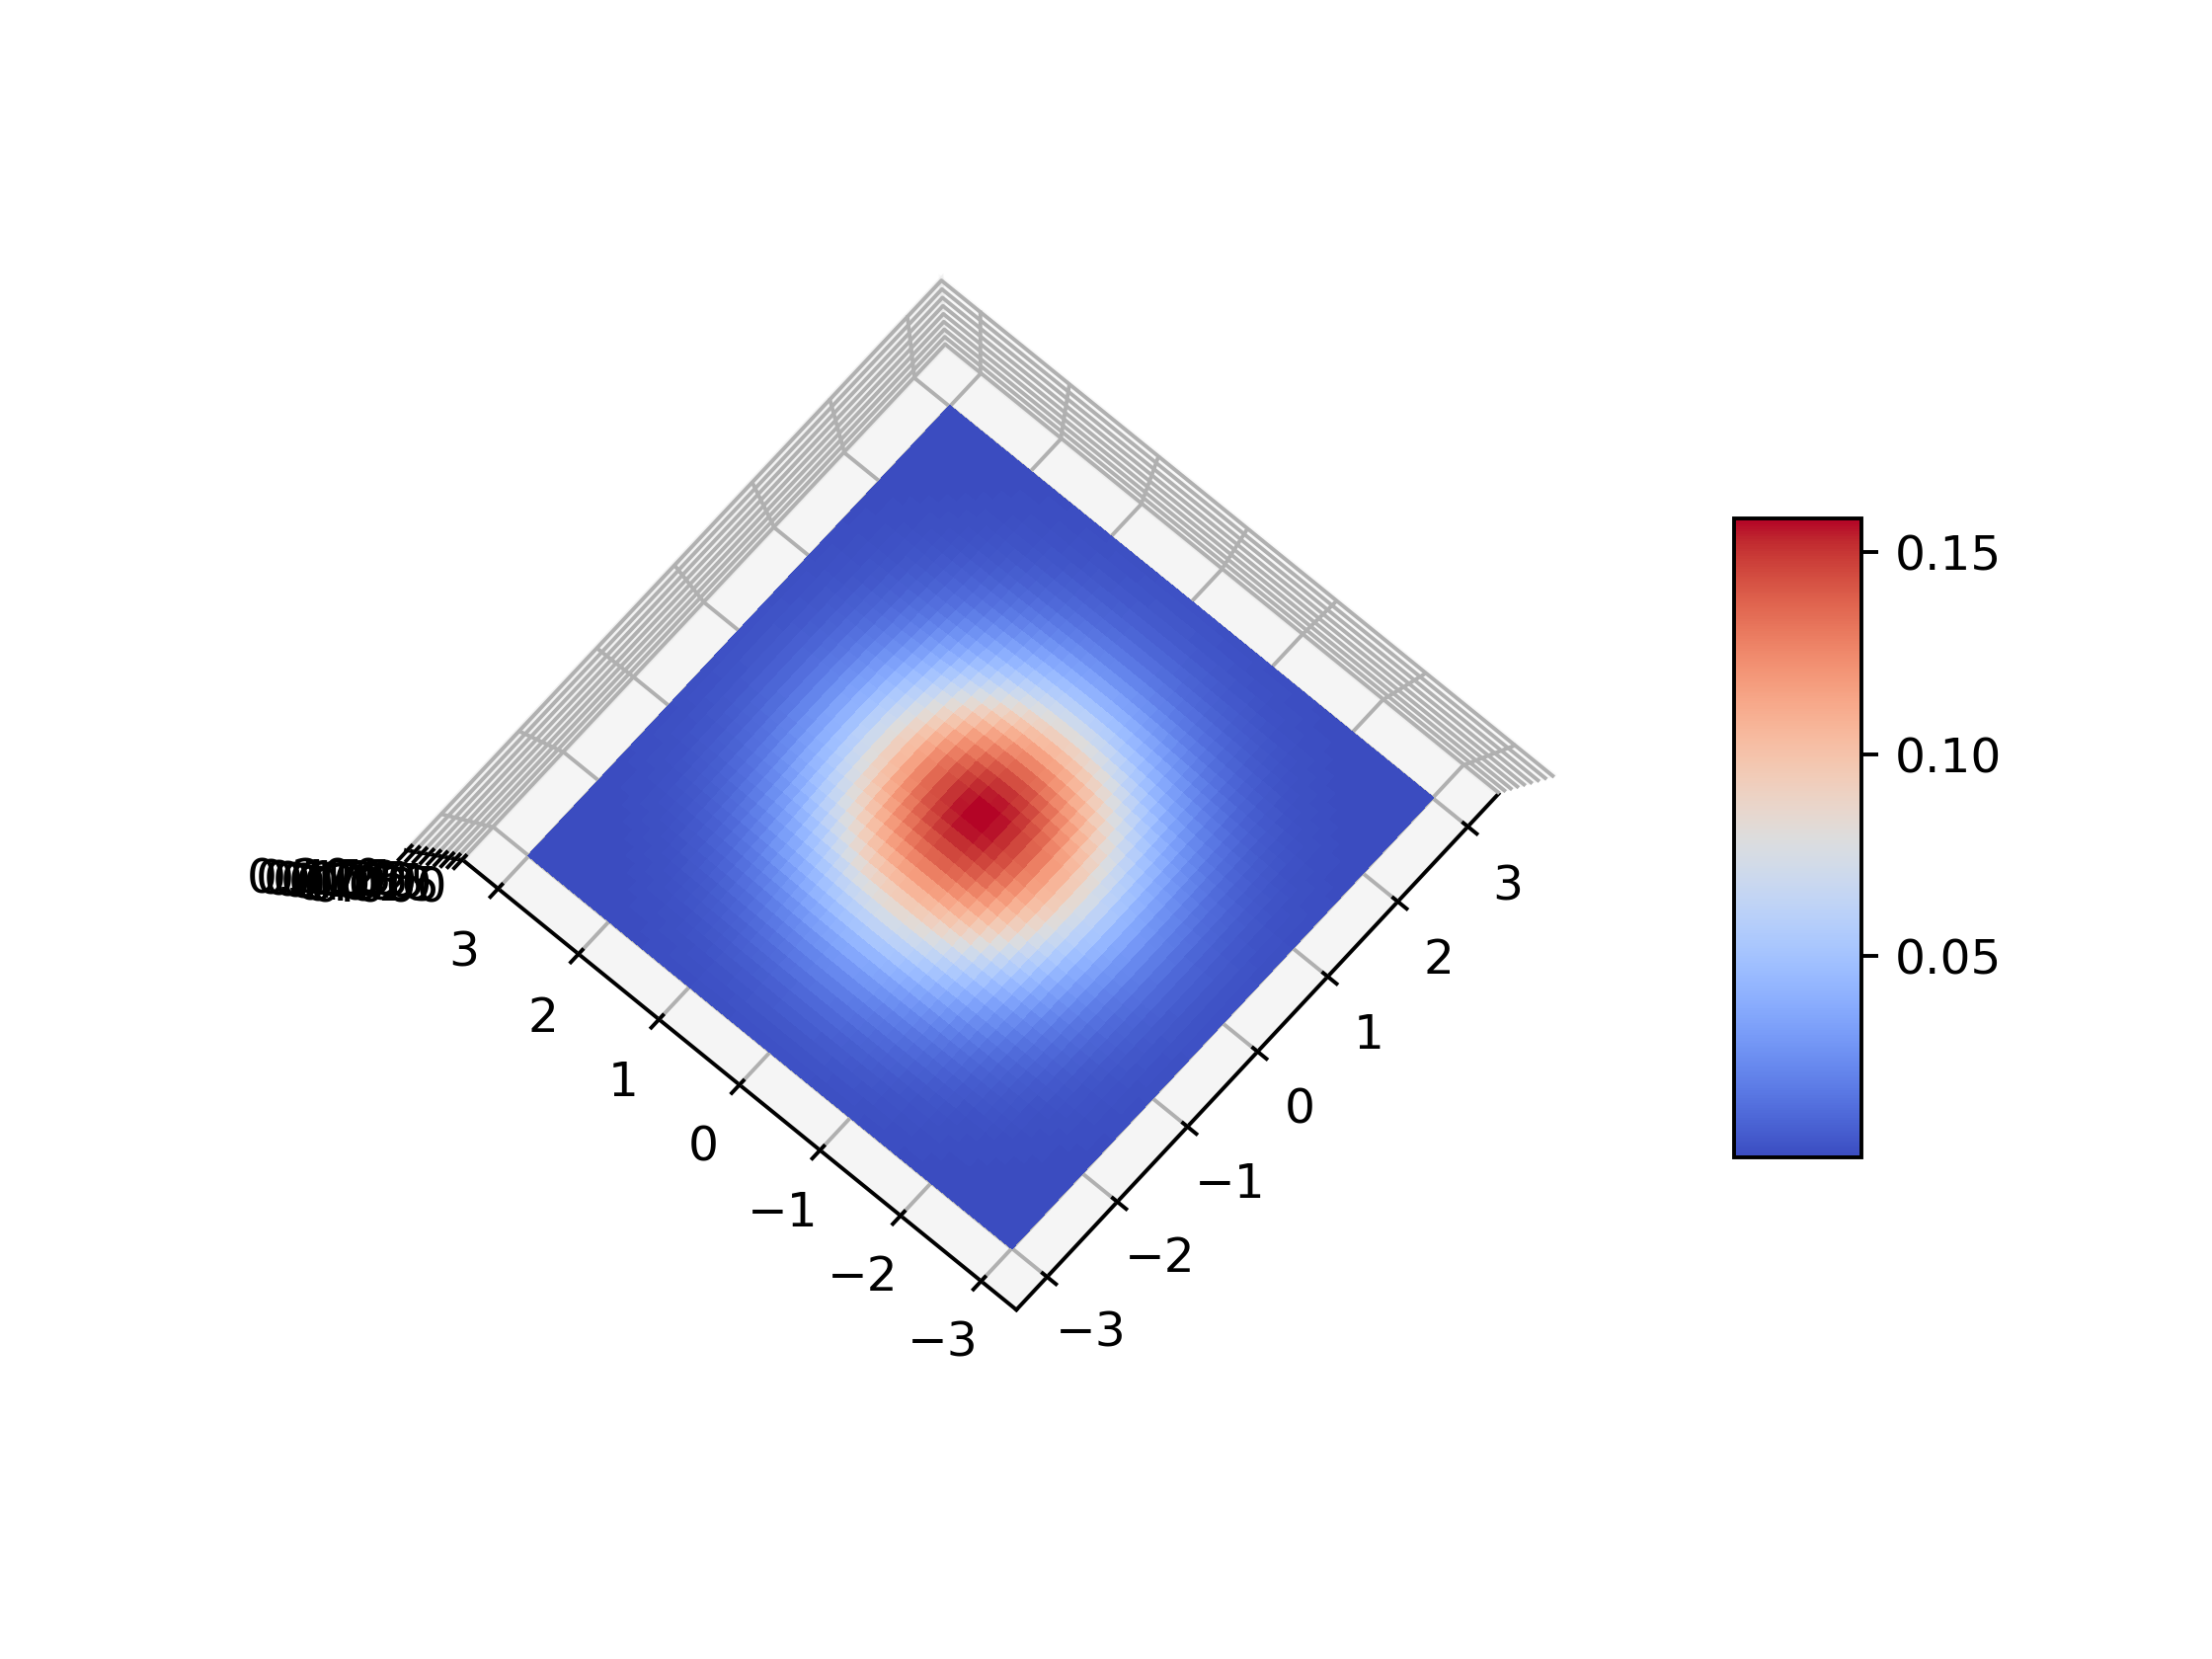

In [25]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

mean = np.matrix([[0.], [0.]])
covariance = np.matrix([
    [1., 0.], 
    [0., 1.]])  
x, y, z = surface(mean, covariance)

surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_zlim(0, 0.2)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

<IPython.core.display.Javascript object>


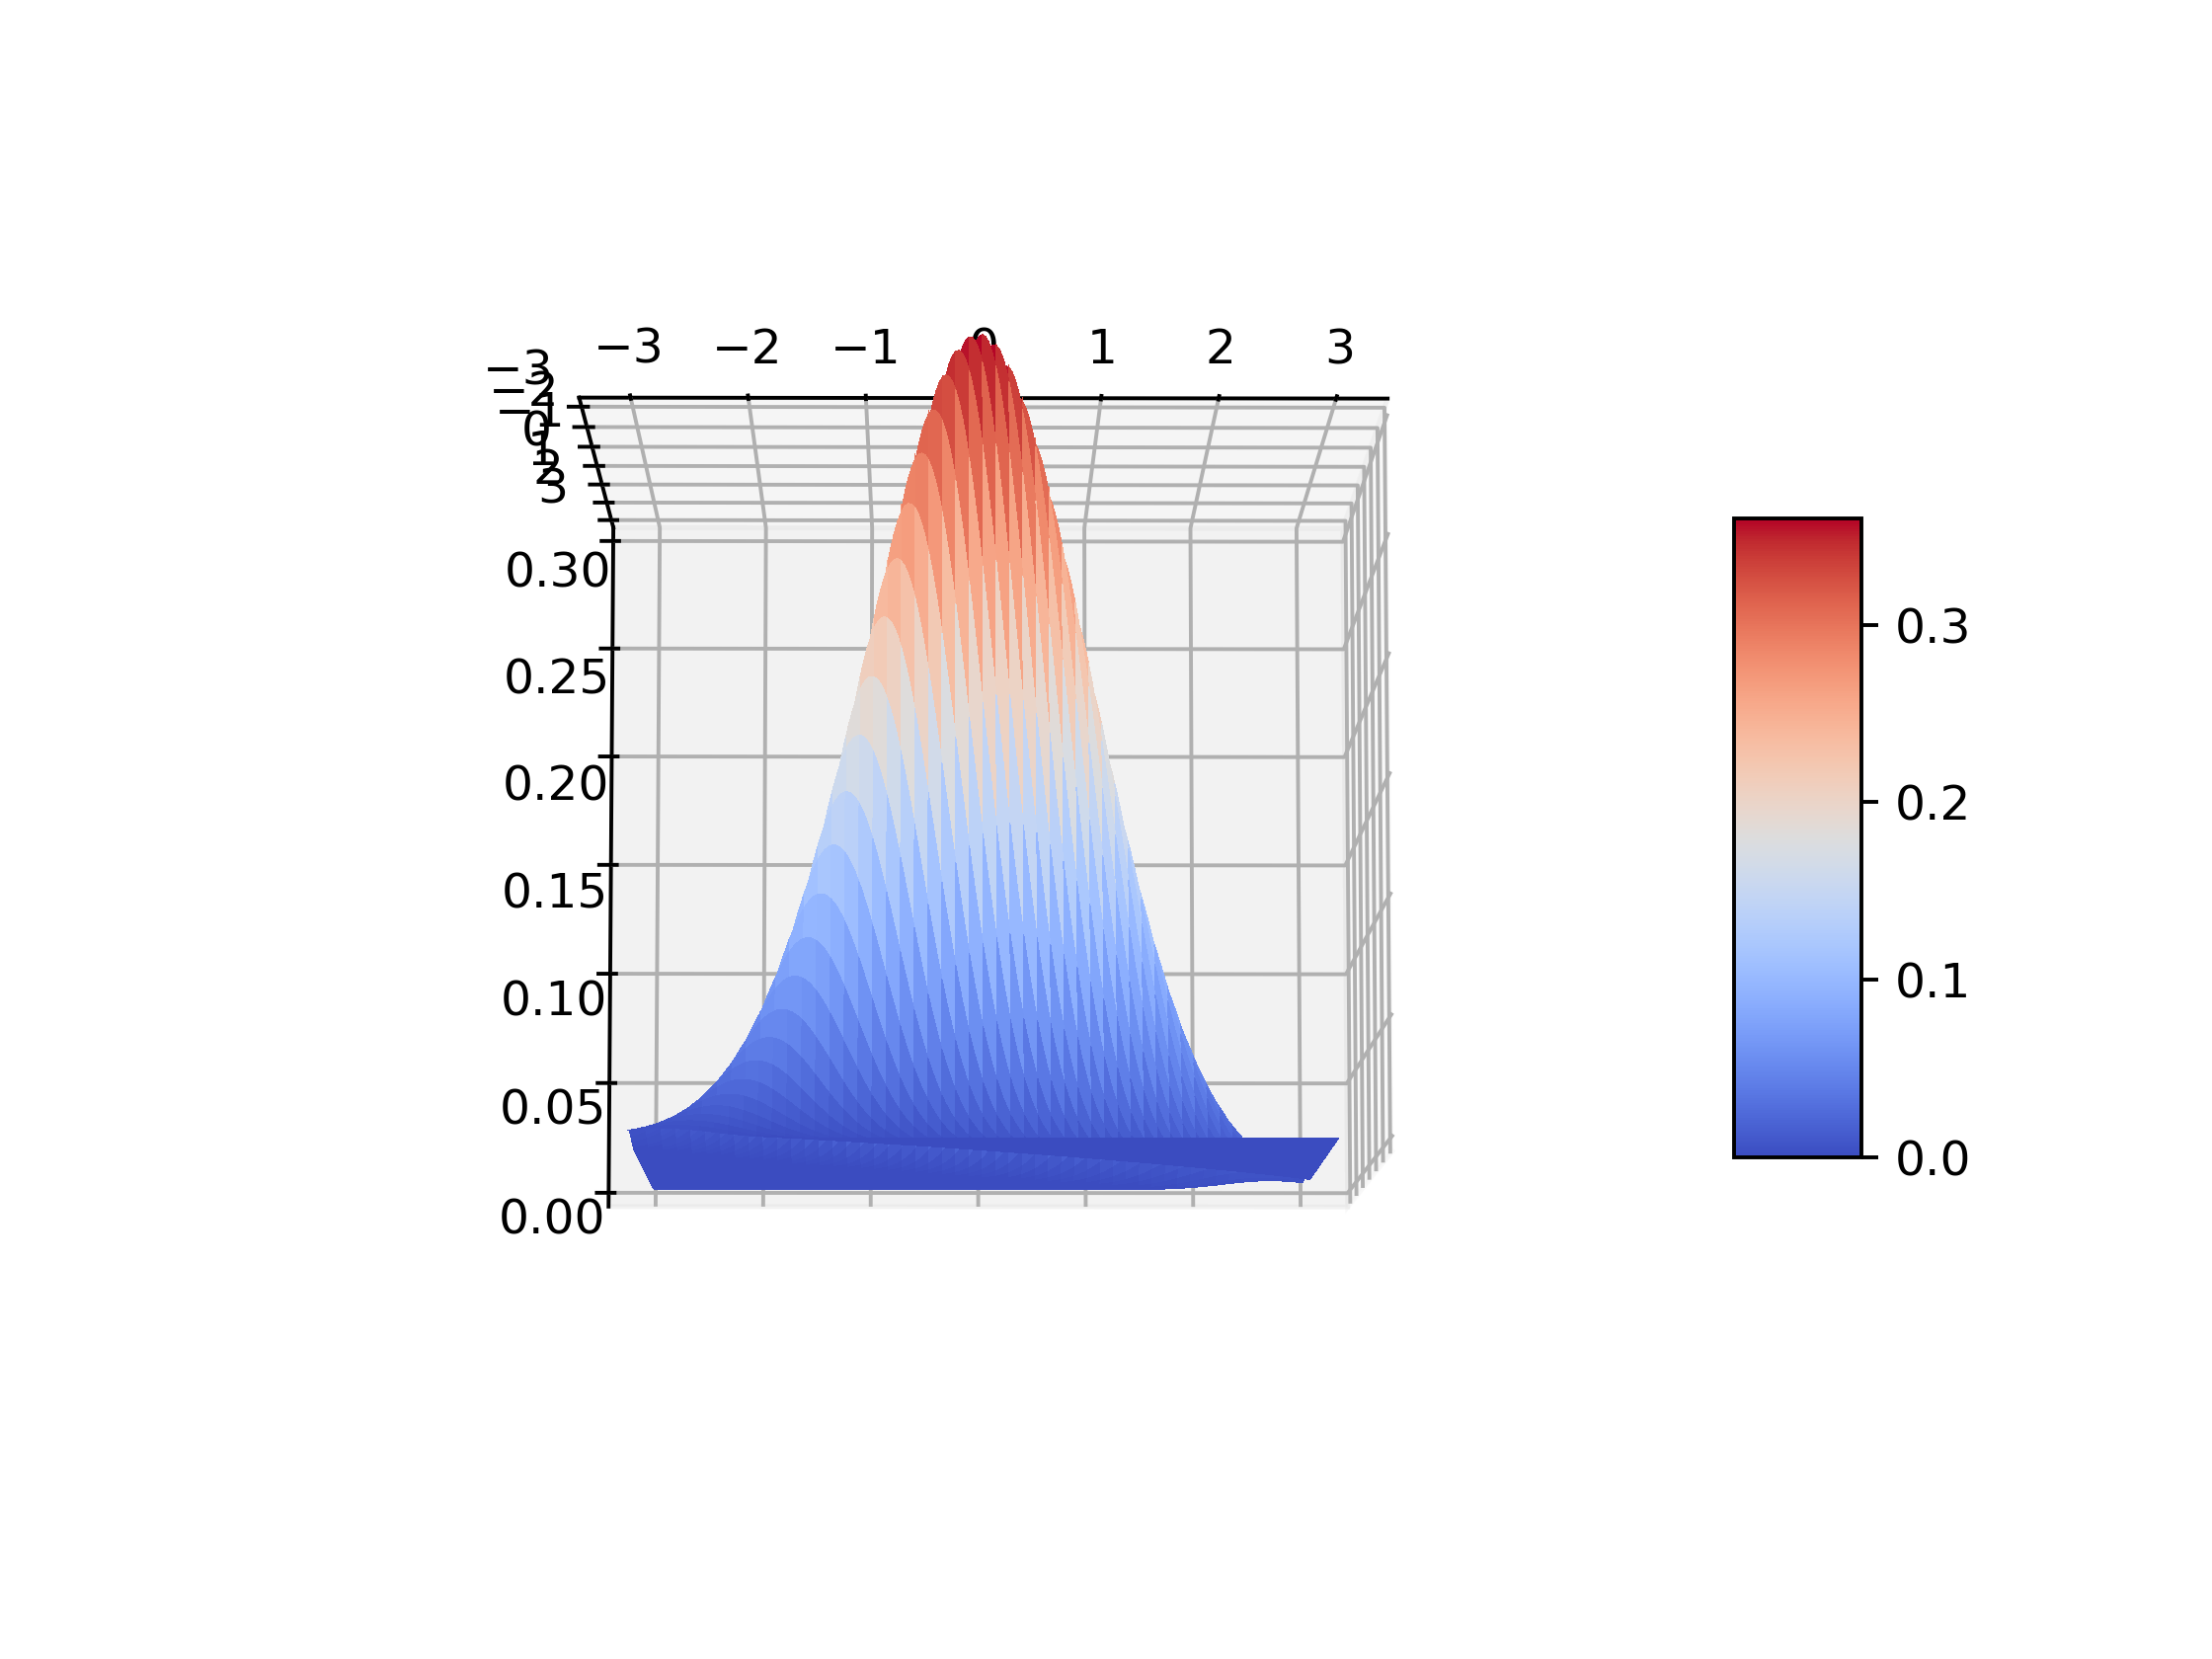

In [29]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

mean = np.matrix([[0.], [0.]])
covariance = np.matrix([
    [1., 0.9], 
    [0.9, 1.]])  
x, y, z = surface(mean, covariance)

surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_zlim(0, 0.3)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()



## Linear Regression Revisited

<IPython.core.display.Javascript object>


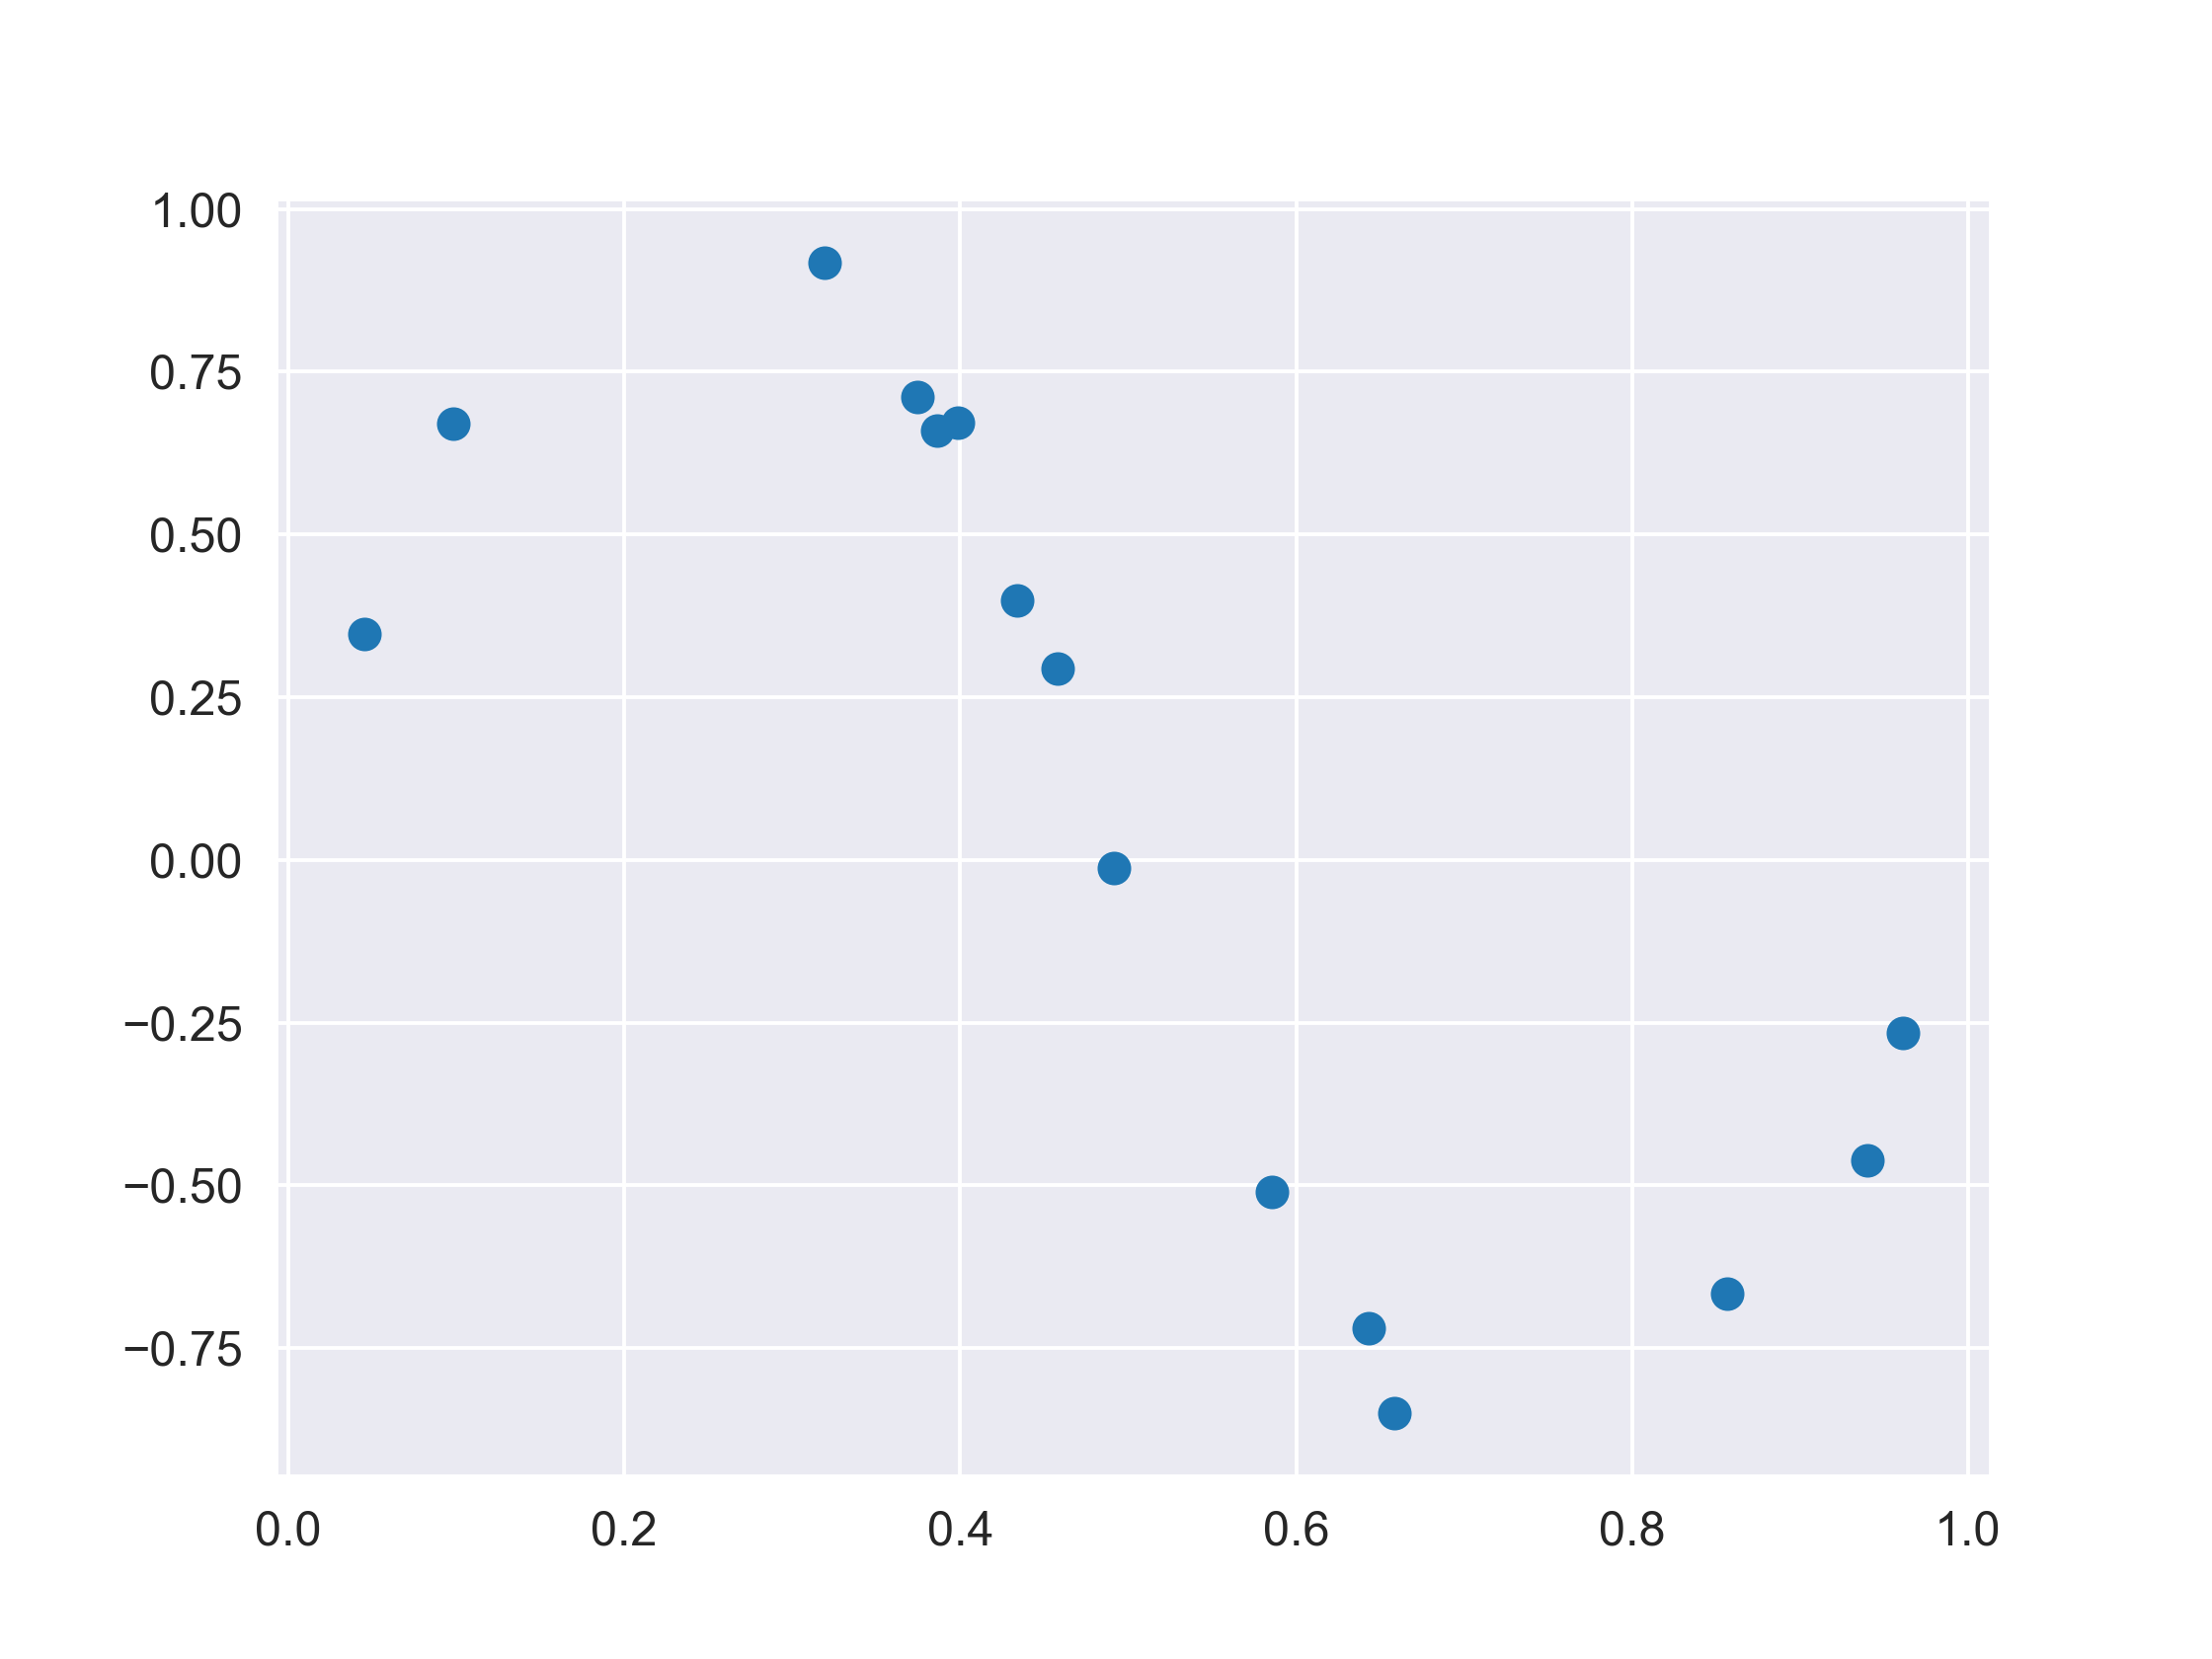

In [24]:
### Generating the data ##########
n_points=15
P=[]
for i in range (0,n_points):
	x=np.random.random()
	y=np.sin(2*np.pi*x)
	z=y+np.random.normal(0,0.05)
#	print (x,z)
	P.append([x,z])

plt.figure()
plt.scatter(*zip(*P))    
plt.show()


In [5]:
P

[[0.45606998421703593, 0.20958138658243655],
 [0.5142344384136116, -0.02954637874443599],
 [0.5924145688620425, -0.5363521780014958],
 [0.17052412368729153, 0.8263448541638341],
 [0.06505159298527952, 0.33741999169677145],
 [0.09767211400638387, 0.6706336646478746],
 [0.6842330265121569, -1.017985325819364],
 [0.4951769101112702, 0.014124190737620747],
 [0.034388521115218396, 0.19144708871067084],
 [0.662522284353982, -0.8137784232084905]]

In [ ]:

### Result ##########

P=[[0.8846440661991892, -0.864791215635069],
 [0.793349886821054, -1.32738612014193],
 [0.7354408415584879, -1.18222466237236],
 [0.42187176484679356, 0.304255805886633],
 [0.011883272993057137, 0.101594120287724],
 [0.22677018897293355, 1.13377458999431],
 [0.9785306716286032, -0.147028527196347],
 [0.043107697015664526, 0.247622971933151],
 [0.8900032869307322, -0.605625802202937],
 [0.8883627996249959, -0.649537521948140]]


In [25]:
X1=np.empty((2,n_points))
for i in range (0,2):
	for j in range(0,n_points):
		X1[i,j]=(P[j][0])**i


X3=np.empty((4,n_points))
for i in range (0,4):
	for j in range(0,n_points):
		X3[i,j]=(P[j][0])**i

X6=np.empty((7,n_points))
for i in range (0,7):
	for j in range(0,n_points):
		X6[i,j]=(P[j][0])**i

X9=np.empty((10,n_points))
for i in range (0,10):
	for j in range(0,n_points):
		X9[i,j]=(P[j][0])**i

T=np.empty((n_points,1))
for i in range (0,n_points):
	T[i,0]=P[i][1]


In [26]:

Y1=X1@X1.transpose()
Y3=X3@X3.transpose()
Y6=X6@X6.transpose()
Y9=X9@X9.transpose()

W1=np.linalg.inv(Y1)@X1@T
W3=np.linalg.inv(Y3)@X3@T
W6=np.linalg.inv(Y6)@X6@T
W9=np.linalg.inv(Y9)@X9@T



In [27]:

def F1(x):
    return W1[0][0]+W1[1][0]*x

def F3(x):
    return W3[0][0]+W3[1][0]*x+W3[2][0]*x**2+W3[3][0]*x**3

def F6(x):
    return W6[0][0]+W6[1][0]*x+W6[2][0]*x**2+W6[3][0]*x**3+W6[4][0]*x**4+W6[5][0]*x**5+W6[6][0]*x**6

def F9(x):
    return W9[0][0]+W9[1][0]*x+W9[2][0]*x**2+W9[3][0]*x**3+W9[4][0]*x**4+W9[5][0]*x**5+W9[6][0]*x**6+W9[7][0]*x**7+W9[8][0]*x**8+W9[9][0]*x**9


<IPython.core.display.Javascript object>


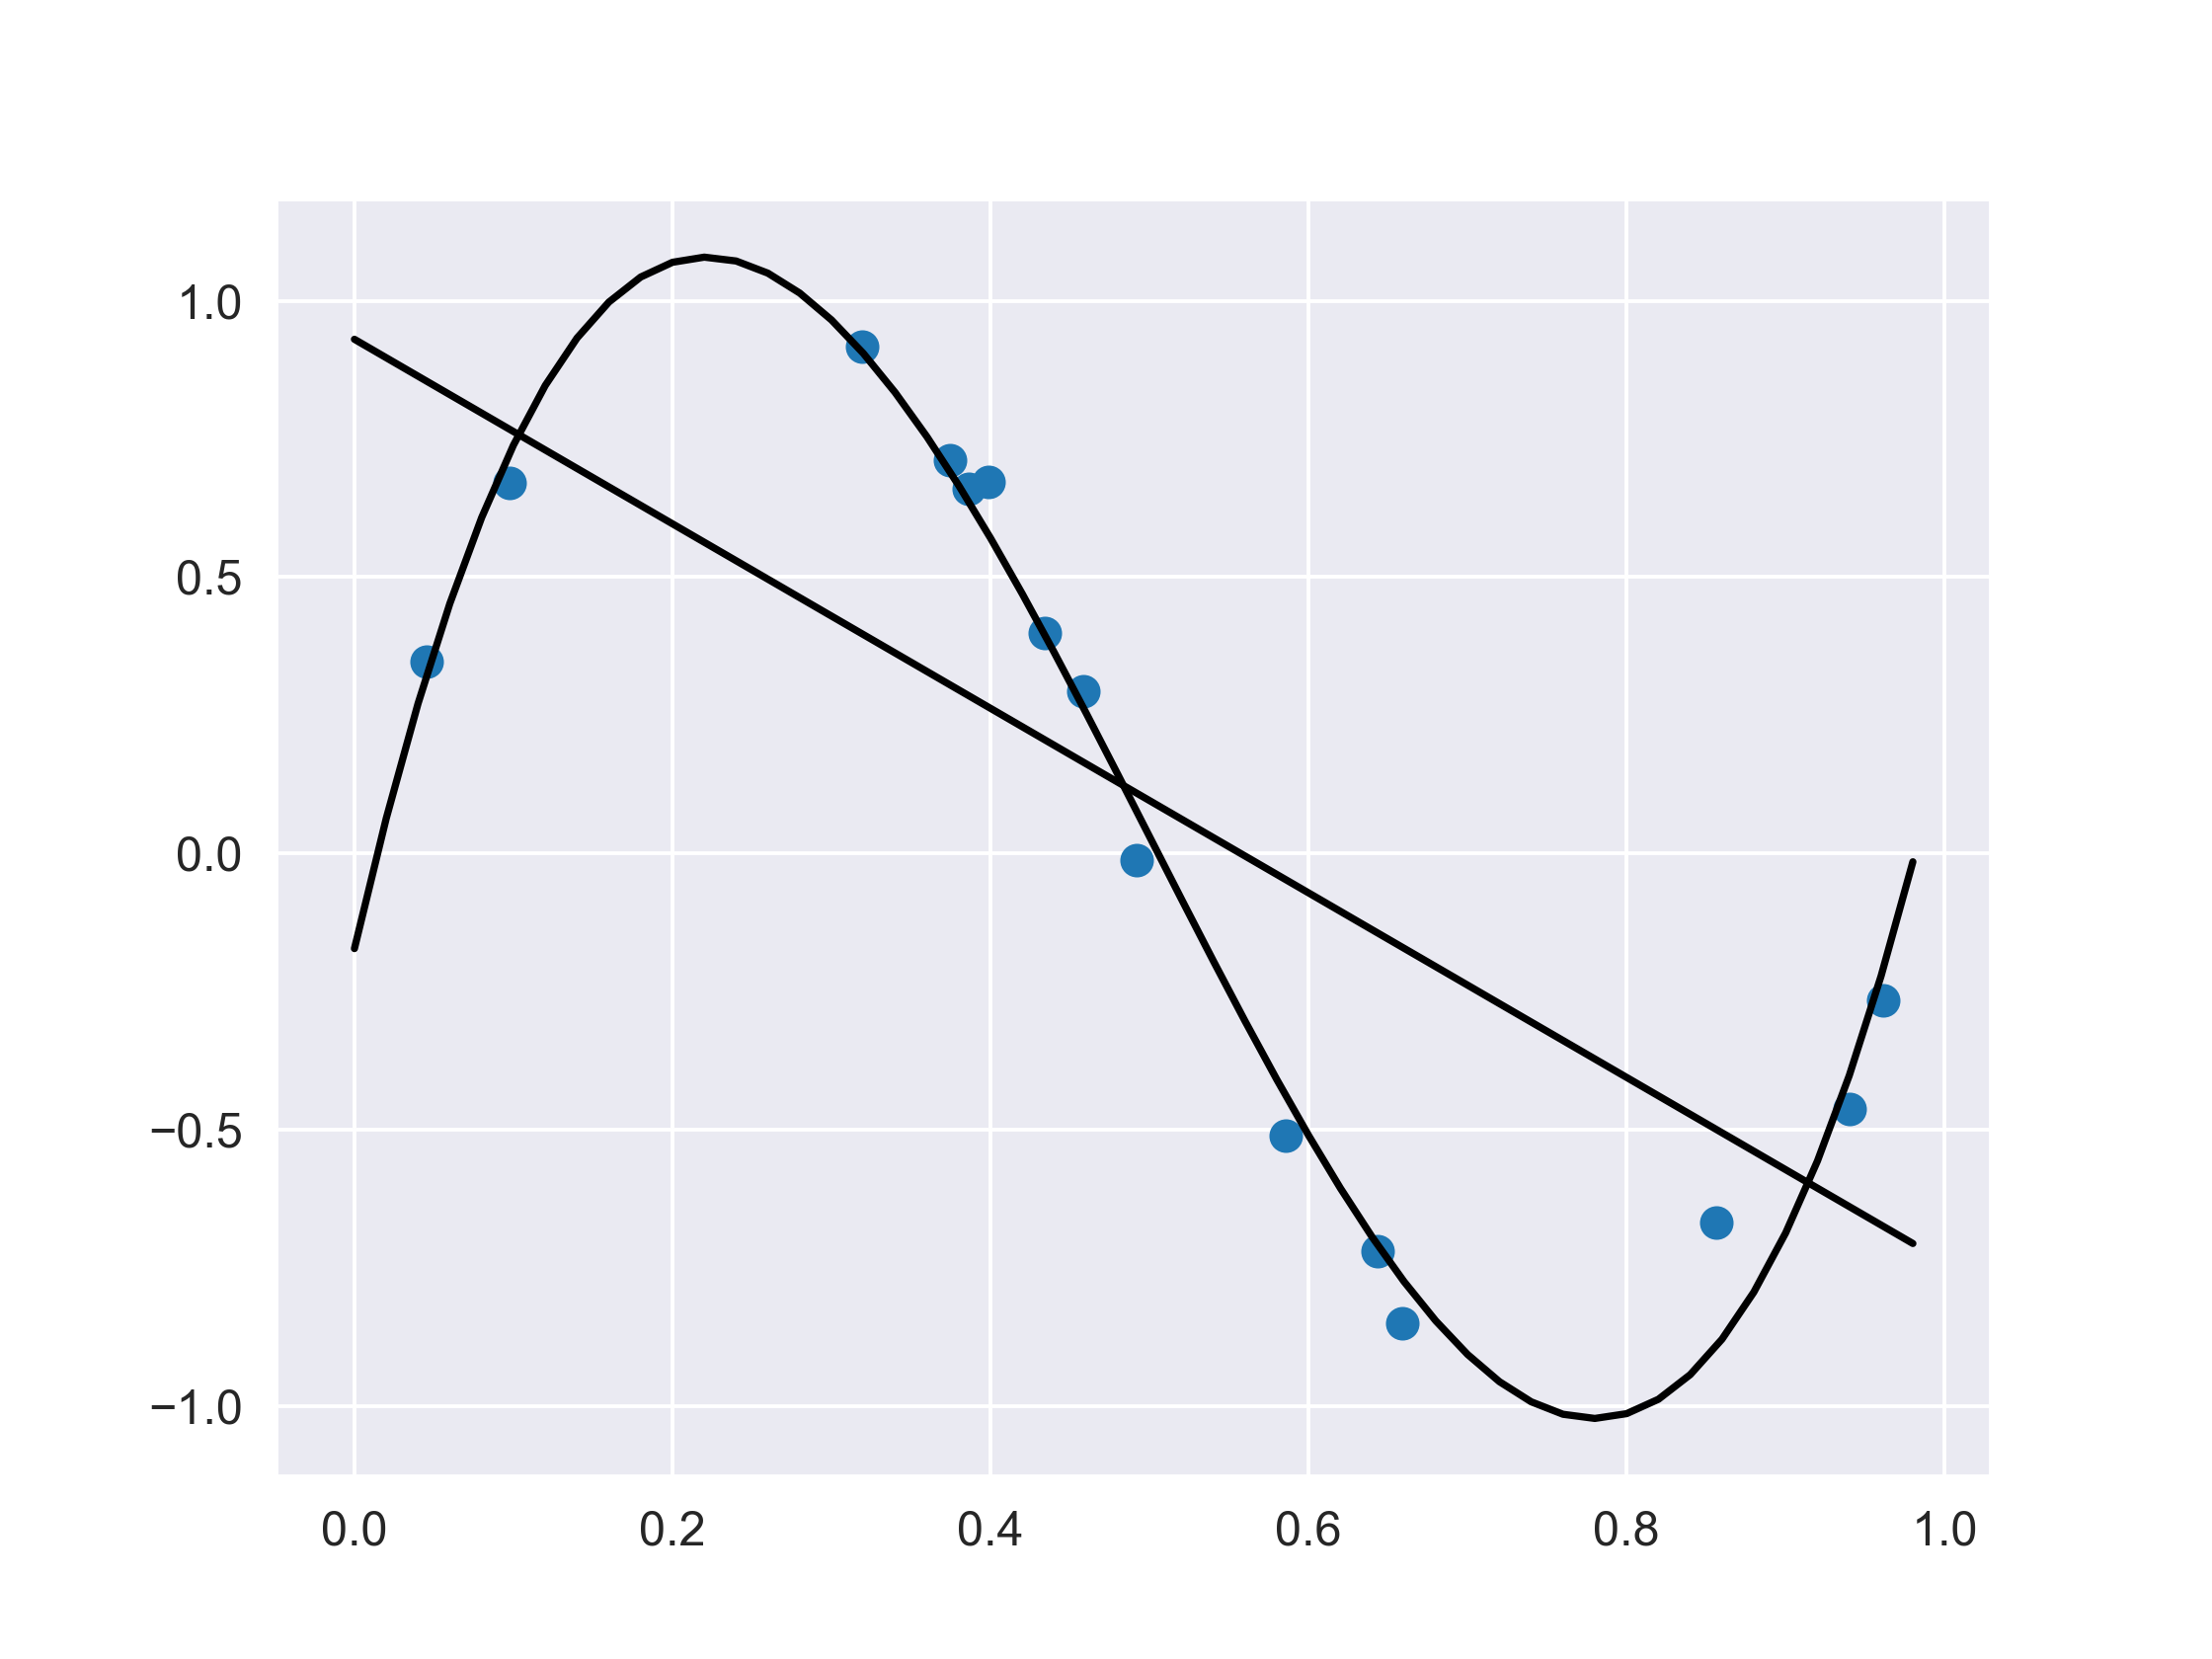

<IPython.core.display.Javascript object>


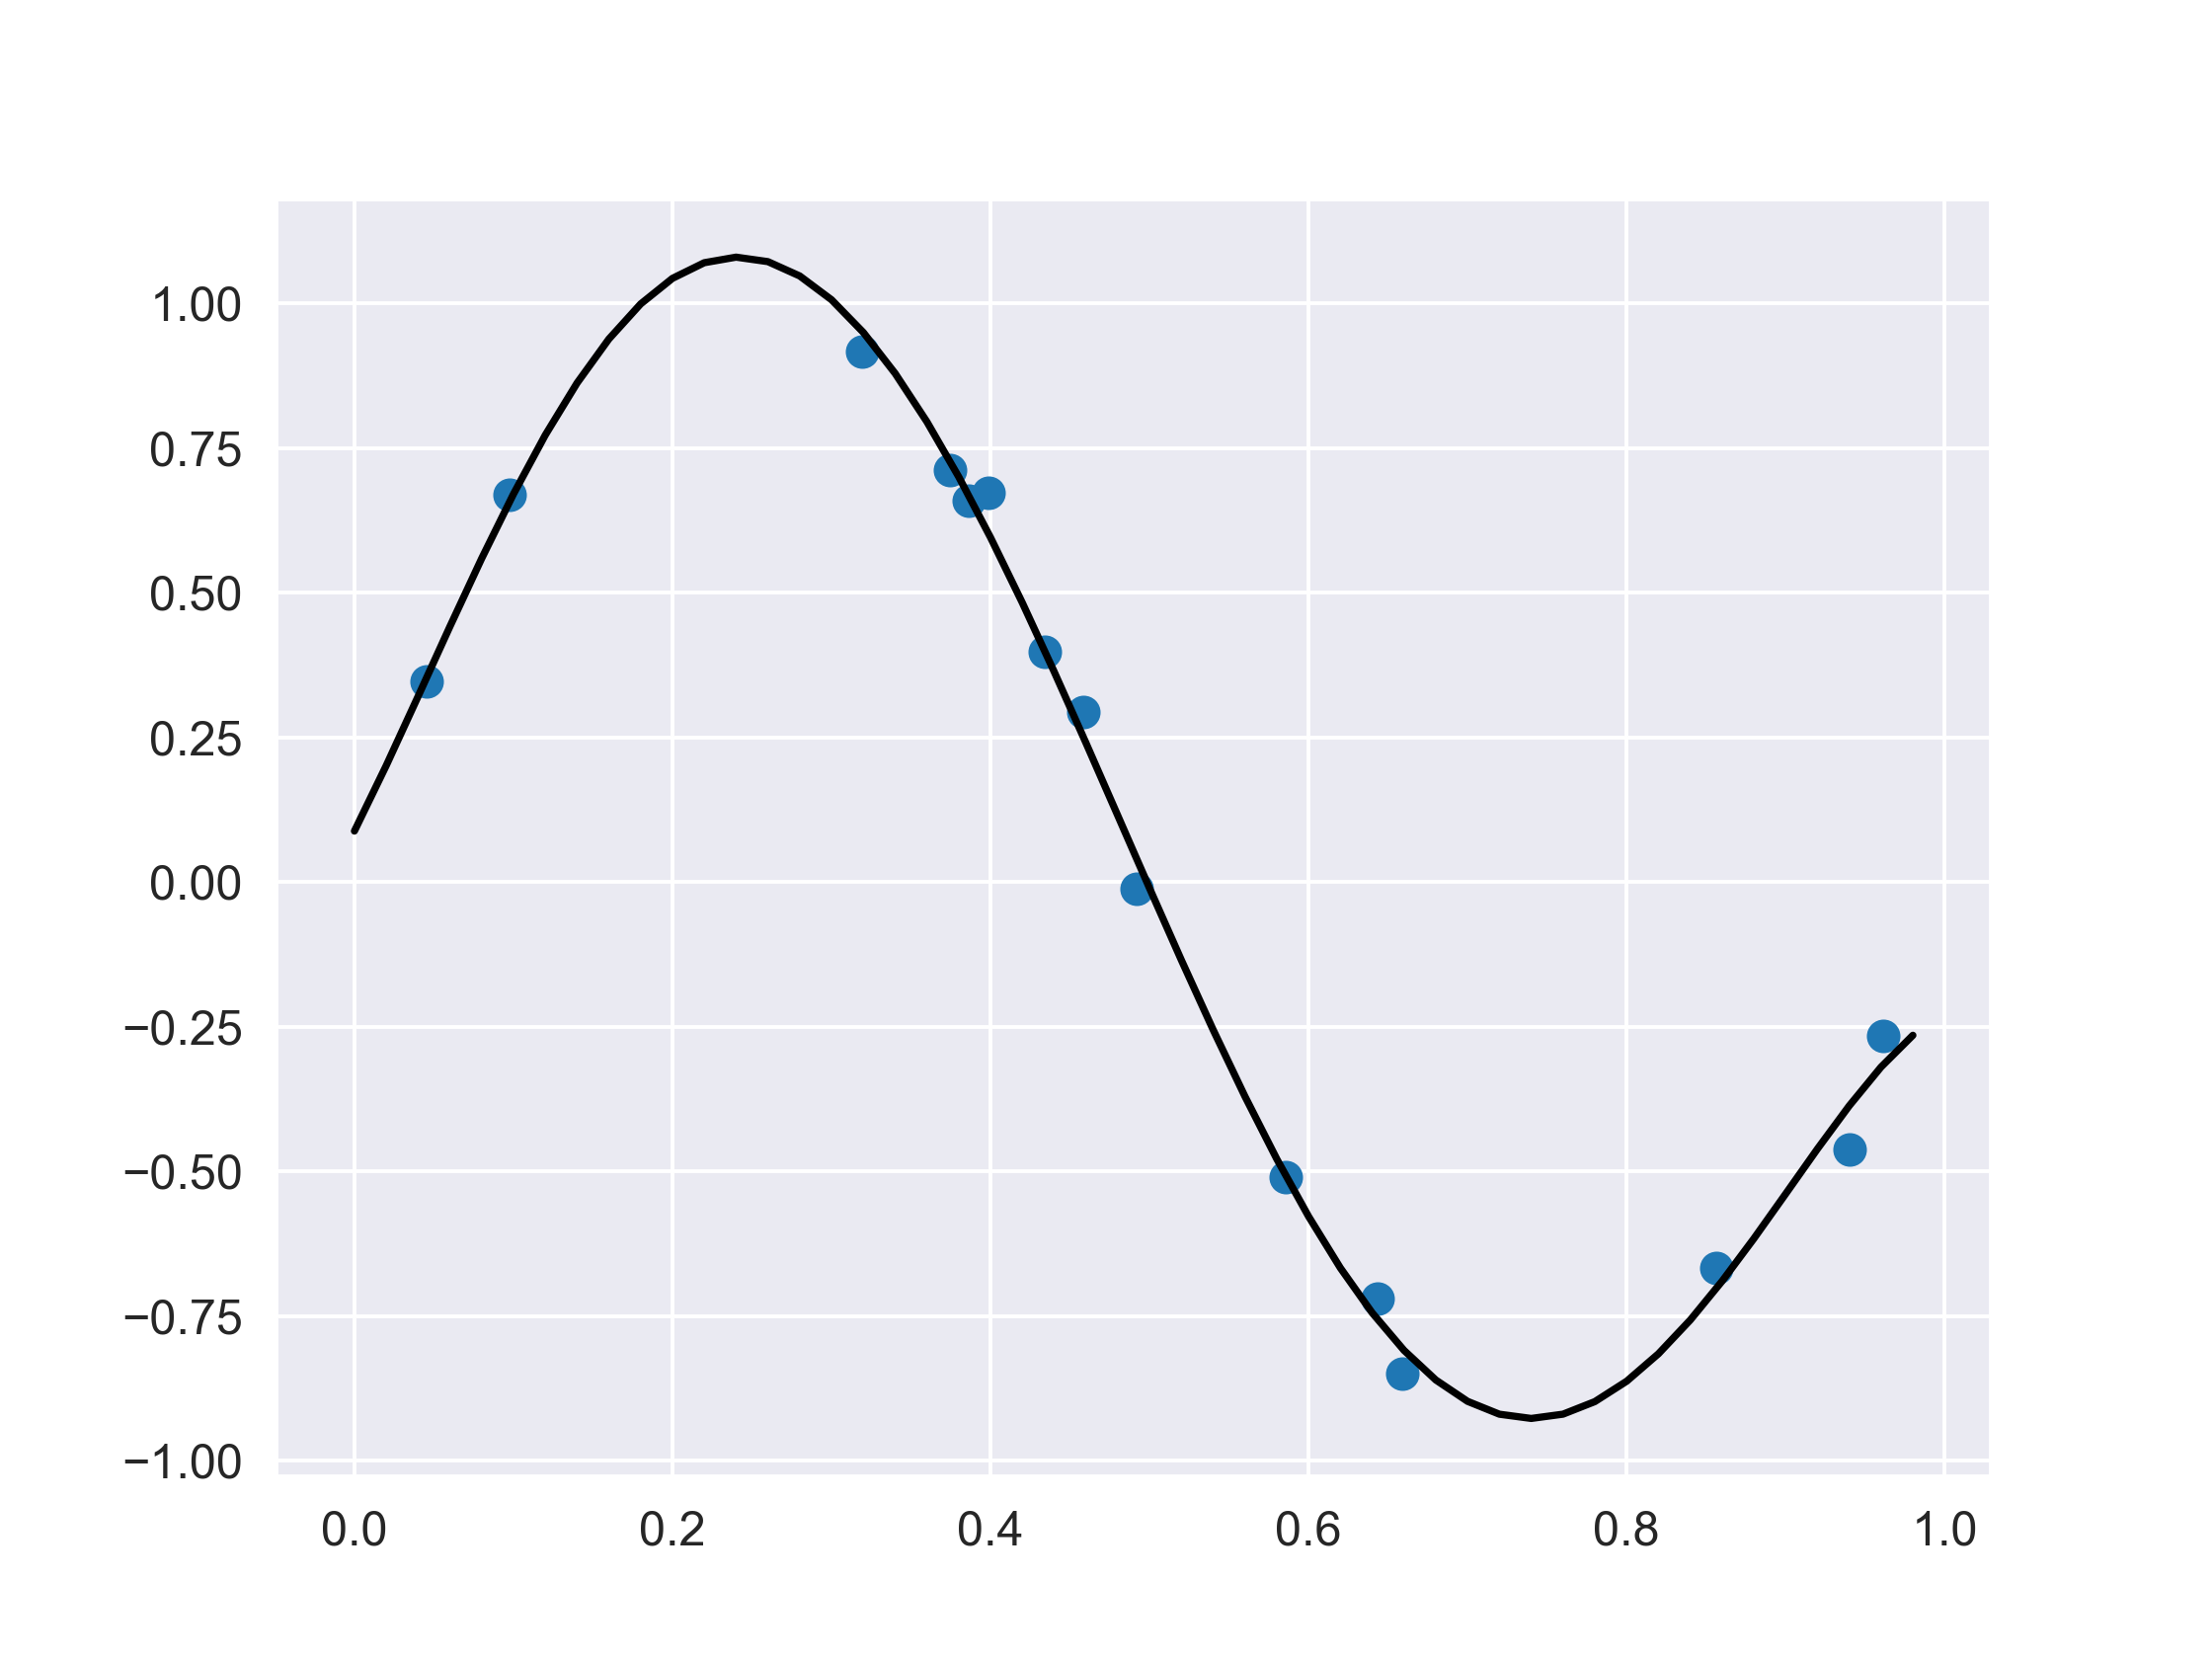

<IPython.core.display.Javascript object>


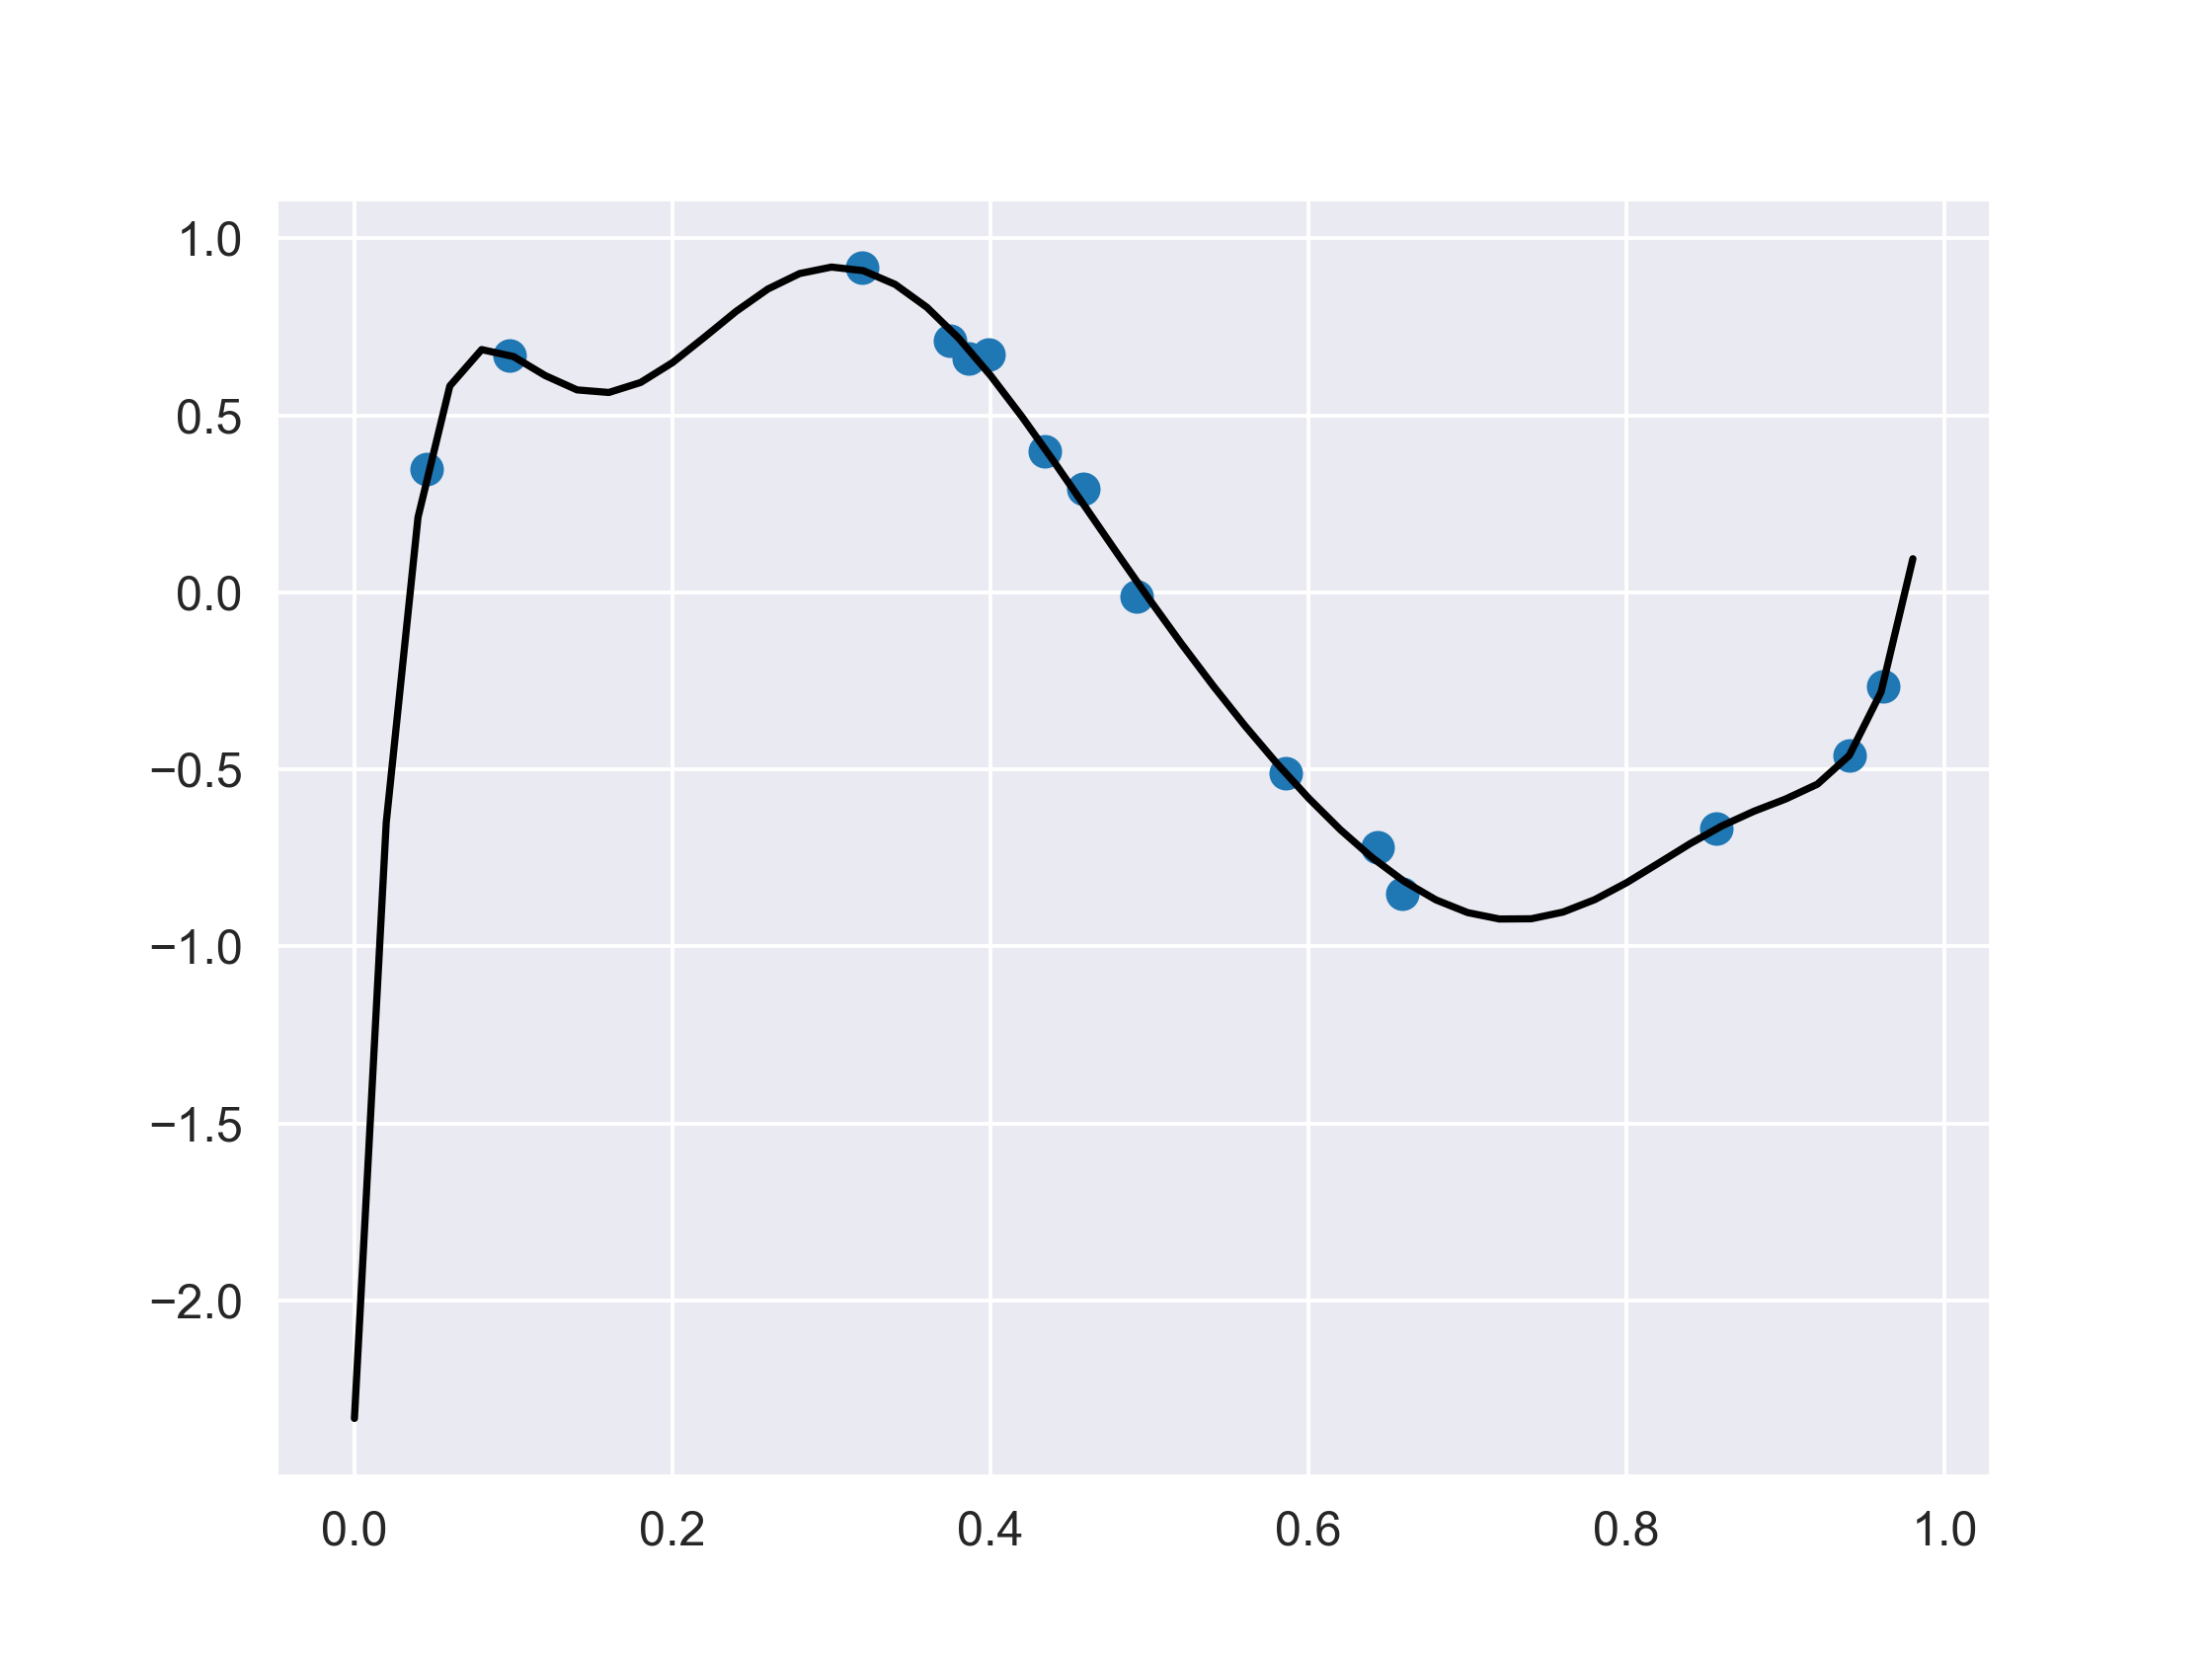

In [28]:
xe=np.arange(0,1,0.02)

plt.figure()
plt.plot(xe, F1(xe),'k')
plt.plot(xe, F3(xe),'k')
plt.scatter(*zip(*P))


plt.figure()
plt.plot(xe, F6(xe),'k')
plt.scatter(*zip(*P))

plt.figure()
plt.plot(xe, F9(xe),'k')
plt.scatter(*zip(*P))



In [38]:
print(F6(0.123)) 
print(F9(0.123))

0.5486579835460237
24.875366088108674


<IPython.core.display.Javascript object>


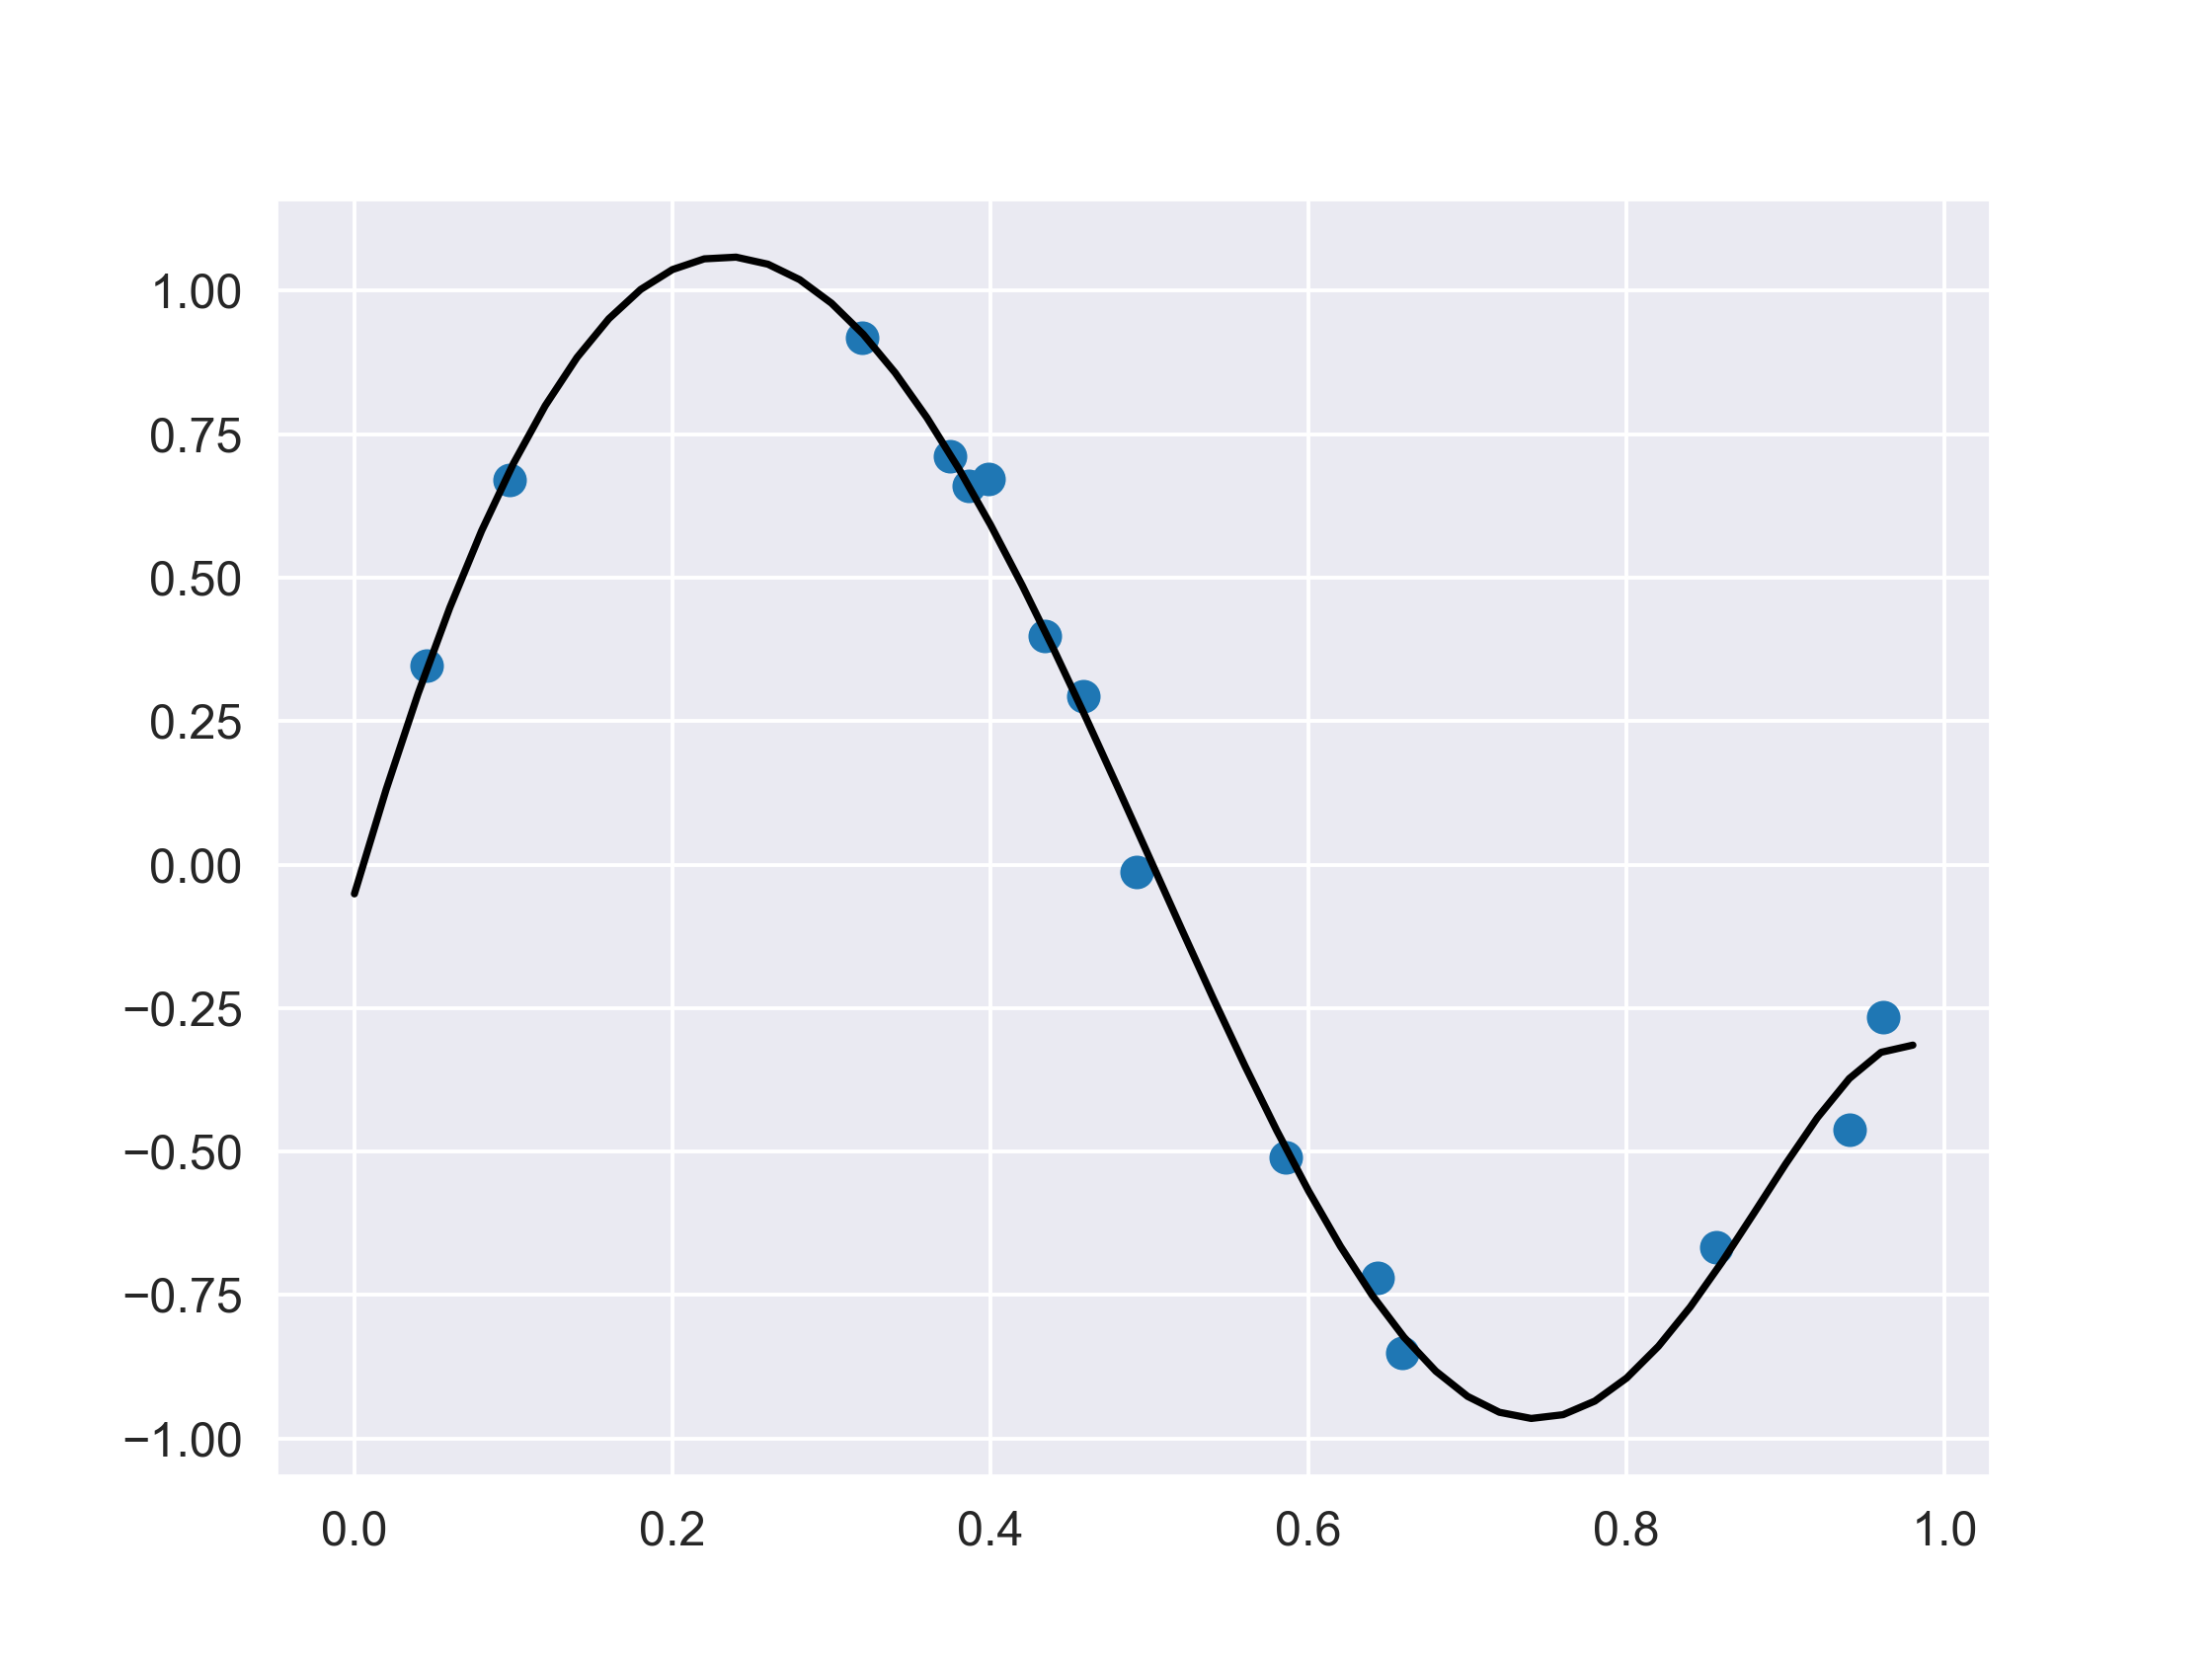

In [29]:
alpha=0.01
beta=1000

X9=np.empty((10,n_points))
for i in range (0,10):
	for j in range(0,n_points):
		X9[i,j]=(P[j][0])**i

T=np.empty((n_points,1))
for i in range (0,n_points):
	T[i,0]=P[i][1]

Y9=X9@X9.transpose()

S_inv=beta*Y9+alpha*np.identity(10)

S=np.linalg.inv(S_inv)

W9=beta*S@X9@T


def FB9(x):
    return W9[0][0]+W9[1][0]*x+W9[2][0]*x**2+W9[3][0]*x**3 \
           +W9[4][0]*x**4+W9[5][0]*x**5+W9[6][0]*x**6 \
           +W9[7][0]*x**7+W9[8][0]*x**8+W9[9][0]*x**9

xe=np.arange(0,1,0.02)

plt.figure()
plt.plot(xe, FB9(xe),'k')
plt.scatter(*zip(*P))
